In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

# 0. 概览

In [4]:
df_death = pd.read_csv("deaths/kill_match_stats_final_0.csv")

In [5]:
df_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13426348 entries, 0 to 13426347
Data columns (total 12 columns):
killed_by            object
killer_name          object
killer_placement     float64
killer_position_x    float64
killer_position_y    float64
map                  object
match_id             object
time                 int64
victim_name          object
victim_placement     float64
victim_position_x    float64
victim_position_y    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.2+ GB


In [ ]:
df_death.columns

In [6]:
db = sqlite3.connect('pubg_data.db')

In [7]:
cursor = db.cursor()

In [8]:
cursor.execute("SELECT count(*) FROM death")

In [9]:
cursor.fetchall()

[(65370475,)]

In [ ]:
cursor.execute("SELECT count(*) FROM aggregate")

In [ ]:
cursor.fetchall()

# 1. csv -> sqlite3

In [ ]:
# death
'''
for i in range(5):
    df_death = pd.read_csv("deaths/kill_match_stats_final_{}.csv".format(i))
    df_death.to_sql('death', db, if_exists='append', index=False)
'''

In [ ]:
df_agg = pd.read_csv("aggregate/agg_match_stats_0.csv", nrows=100)

In [ ]:
df_agg.head()

In [ ]:
# aggregate
'''
for i in range(5):
    df_death = pd.read_csv("aggregate/agg_match_stats_{}.csv".format(i))
    df_death.to_sql('aggregate', db, if_exists='append', index=False)
'''

In [ ]:
db.commit()

# 2. Visulaizaiton

In [14]:
cursor.execute("SELECT * FROM death LIMIT 5;")

In [16]:
cursor.fetchone()

('Grenade',
 'KrazyPortuguese',
 5.0,
 657725.1,
 146275.2,
 'MIRAMAR',
 '2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QBwCTNTBJ5B_1Ocel6nY',
 823,
 'KrazyPortuguese',
 5.0,
 657725.1,
 146275.2)

In [13]:
img = plt.imread("miramar.jpg")

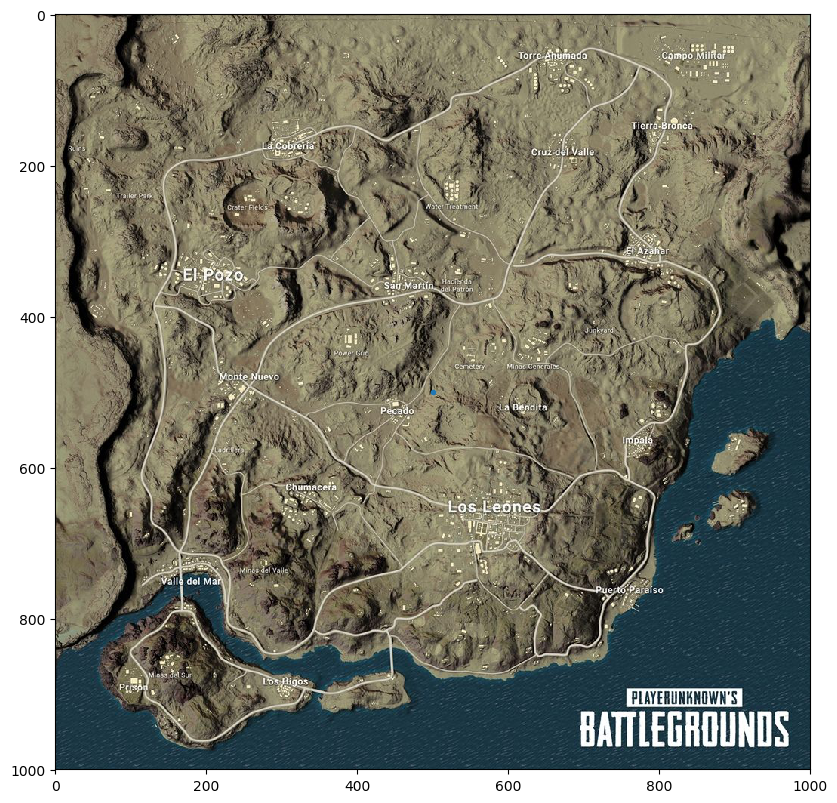

In [17]:
fig = plt.figure(figsize=(10,10),dpi=100)

plt.imshow(img)
plt.scatter([500], [500], marker='.')

In [18]:
ratio = 1000/800000

In [35]:
cursor.execute("SELECT victim_position_x, victim_position_y FROM death WHERE map='MIRAMAR' AND time < 180 ORDER BY random() LIMIT 500000 ")

In [36]:
early_dead_coords = cursor.fetchall()

In [37]:
len(early_dead_coords)

500000

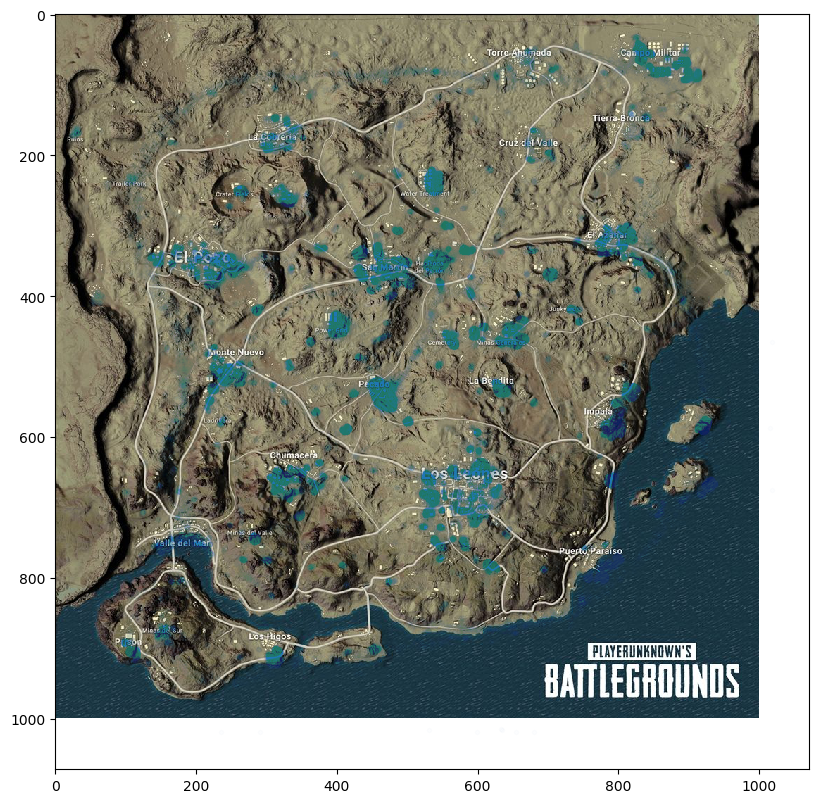

In [38]:
fig = plt.figure(figsize=(10,10), dpi=100)
plt.imshow(img)

plt.scatter([i[0]*ratio for i in early_dead_coords if 0 not in i], [i[1]*ratio for i in early_dead_coords if 0 not in i], \
            marker='.', alpha=0.01)

In [45]:
cursor.execute("SELECT victim_position_x, victim_position_y FROM death WHERE map='MIRAMAR' AND time > 1920 ORDER BY random()")

In [46]:
late_dead_coords = cursor.fetchall()

In [48]:
len(late_dead_coords)

52472

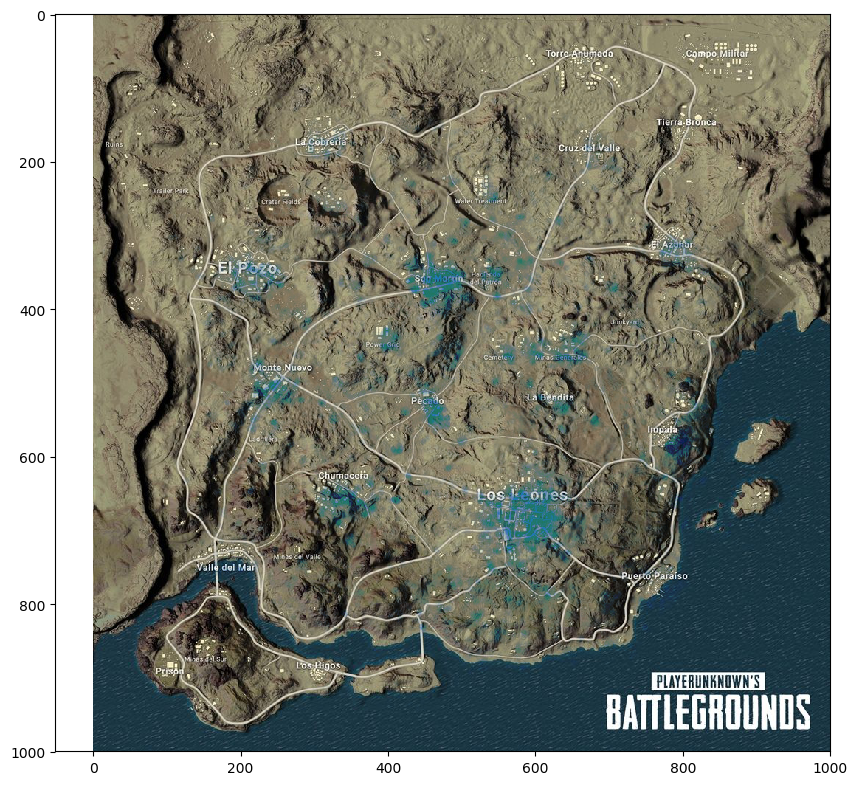

In [47]:
fig = plt.figure(figsize=(10,10),dpi=100)
plt.imshow(img)

plt.scatter([i[0]*ratio for i in late_dead_coords if 0 not in i], [i[1]*ratio for i in late_dead_coords if 0 not in i], \
            marker='.', alpha=0.01)

In [49]:
cursor.execute("SELECT victim_position_x, victim_position_y FROM death WHERE map='MIRAMAR' AND time > 1800 ORDER BY random() LIMIT 100000")

In [50]:
late_dead_coords1 = cursor.fetchall()

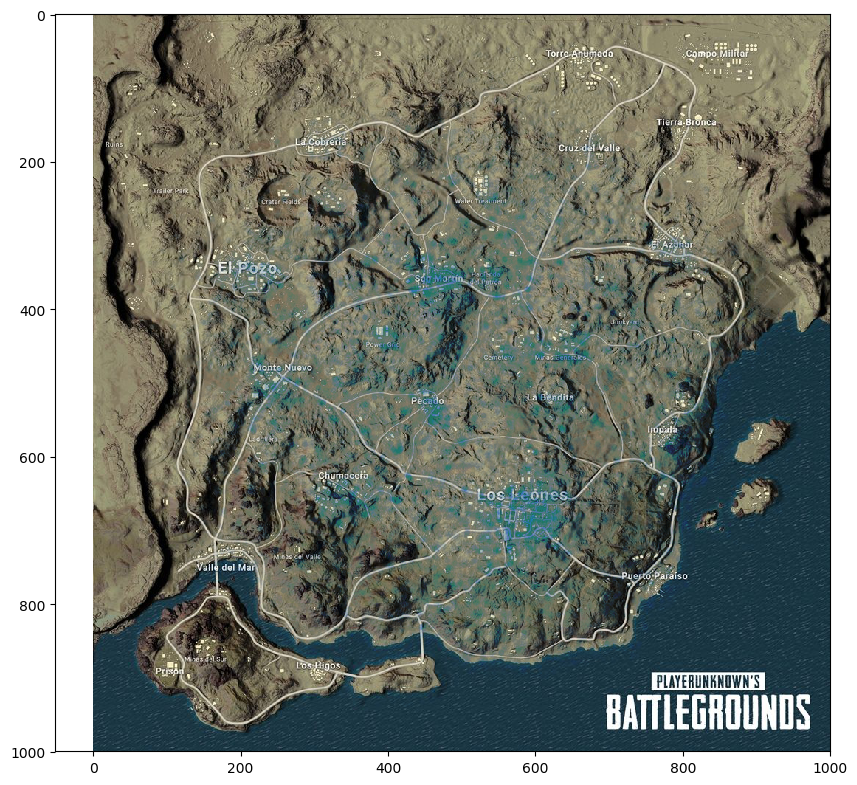

In [51]:
fig = plt.figure(figsize=(10,10),dpi=100)
plt.imshow(img)

plt.scatter([i[0]*ratio for i in late_dead_coords1 if 0 not in i], [i[1]*ratio for i in late_dead_coords1 if 0 not in i], \
            marker='.', alpha=0.01)

# 3. 开车续命